# Mandelbrot and Julia Set

In [1]:
import cv2
import numpy as np
from timelapse.core import plotCV2 as plot
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output

## Methods

In [2]:
def create_blank(width, height, rgb_color=(0, 0, 0)):
    '''
    Returns a blank image of indicated color.
    '''
    img = np.zeros((height, width, 3), np.uint8)
    c = tuple(reversed(rgb_color)) # reverse RGB clors (opencv uses bgr colors)
    img[:] = c
    return img

In [3]:
def f(z, c):
    '''
    Calculates the next generation of the quadratic set of the Mandelbrot or Julia set.
    '''
    return (z[0] * z[0] - z[1] * z[1] + c[0], 2 * z[0] * z[1] + c[1])

In [4]:
def f_n_mbs(c, n = 1000, use_tresh = True, tresh = 2):
    '''
    ============================
    TODO: replace for by while
    ============================
    
    Test a complex numner as a member of the Mandelbrot set by n iterations.
    The number of iterations is returned together with the norm of the final number z after n iteration.
    For use_tresh=True iterating is stopped as soon as the norm of the resulting number is larger than
    the treshold tresh.
    '''
    z = (0, 0)
    if (use_tresh):
        for i in range(0, n):
            z = f(z, c)
            z2 = z[0] * z[0] + z[1] + z[1]
            if (z2 > tresh * tresh):
                return (i + 1) / n, z2
    else:
        for i in range(0, n):
            z = f(z, c)
    z2 = z[0] * z[0] + z[1] + z[1]
    return (i + 1) / n, np.sqrt(z2)

In [5]:
def f_n_js(z, c = (0, 0), n = 1000, use_tresh = True, tresh = 2):
    '''
    ============================
    TODO: replace for by while
    ============================
    
    Test a complex numner as a member of the Julia set by n iterations.
    The number of iterations is returned together with the norm of the final number z after n iteration.
    For use_tresh=True iterating is stopped as soon as the norm of the resulting number is larger than
    the treshold tresh.
    '''
    if (use_tresh):
        for i in range(0, n):
            z = f(z, c)
            z2 = z[0] * z[0] + z[1] + z[1]
            if (z2 > tresh * tresh - tresh):
                return (i + 1) / n, z2
    else:
        for i in range(0, n):
            z = f(z, c)
    z2 = max(0, z[0] * z[0] + z[1] + z[1])
    return (i + 1) / n, np.sqrt(z2)

In [120]:
def get_julia_set(res = (1024, 640), dim = (-1.6, 1.6, -1.0, 1.0), c = (-.8, .156), n_it = 1000, tresh = 3):
    '''
    Calculates the Julia set as defined ny its paramters.
    
    Parameters
    ----------
    res : immage resolutdion in pixels as a tuple res = (x_res, y_res)
    dim : the dimension/area of the complex plane to be considered within the calculations
          dim = (zx_min, zx_max, zy_min, zy_max)
    c :   a constant complex number defined as a tuple with real and imaginary part
    '''
    zx_min = dim[0]
    zx_max = dim[1]
    zy_min = dim[2]
    zy_max = dim[3]
    
    x_res = res[0]
    y_res = res[1]
    
    dzx = (zx_max - zx_min) / x_res
    dzy = (zy_max - zy_min) / y_res
    
    #img = create_blank(x_res, y_res)
    #img = np.zeros((y_res, x_res), np.uint8)
    img = np.zeros((y_res, x_res))

    for x in range(x_res):
        
        zx = zx_min + x * dzx
        
        for y in range(y_res):

            zy = zy_min + y * dzy
            
            n, f_n = f_n_js((zx, zy), c = c, n = n_it, tresh=tresh)
            #img[y][x] = (n, n, n)
            img[y_res - 1 - y][x] = n
                
    return img

## Julia Set

### Calculate with preview and increasing resolution

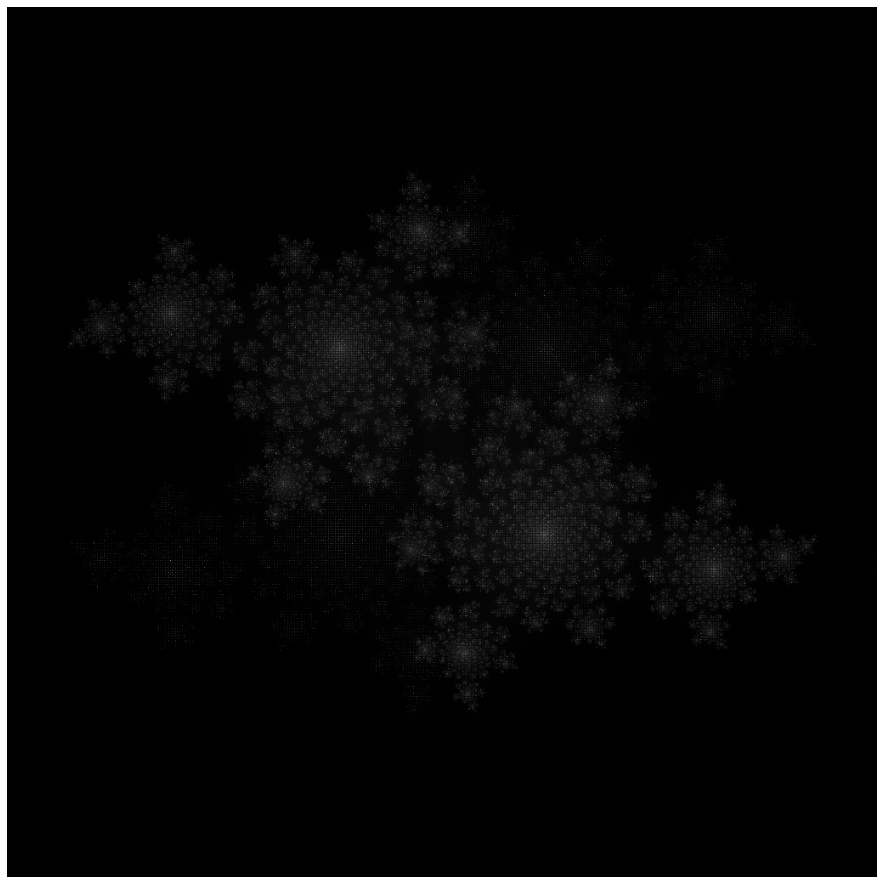

CPU times: user 29 s, sys: 300 ms, total: 29.3 s
Wall time: 30.1 s


In [7]:
%%time

fs = (16, 16)
dim = 1024
img = create_blank(dim, dim, (255, 255, 255))
calc = np.zeros((dim, dim))

reMin = -1.6
reMax = 1.6
imMin = -1.6
imMax = 1.6
dRe = (reMax - reMin) / dim
dIm = (imMax - imMin) / dim



c = (-0.4, 0.6)

step = dim
while (step >= 1):
    for y in range(0, dim, step):
        for x in range(0, dim, step):
            
            if (calc[y][x] == 1):
                color = img[y][x]
            else:
                # calc the current pixel
                re = reMin + x * dRe
                im = imMin + y * dIm
                it, zn = f_n_js((re, im), c, n = 1000, tresh=3)
                b = it * 255
                g = b
                r = b
                color = (g, b, r)
                #r = max(255, zn / 100000)
                #g = 255 * it / 1000
                #b = max(255, r * g)
                #color = (b, g, r)
                img[dim - 1 - y][x] = color
                calc[y][x] = 1
            
            # fill the empty pixels
            for xi in range(x, x + step):
                for yi in range(y, y + step):
                    img[dim - 1 - yi][xi] = color
    
    step = step // 2
    
    # update image
    clear_output(wait=True)
    plt.figure(figsize=fs)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show();

### Calculate in background directly with full resolution

In [121]:
%%time

img_js = get_julia_set()
#img_js = get_julia_set()

CPU times: user 17.5 s, sys: 63.1 ms, total: 17.6 s
Wall time: 17.7 s


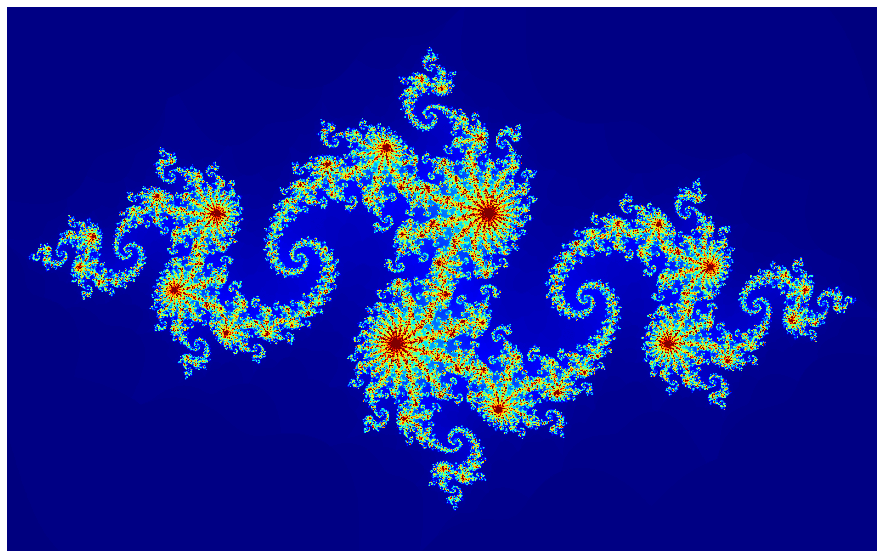

In [122]:
fig = plt.figure(figsize=(16,10))
plt.imshow(img_js, cmap = 'jet', vmin=0, vmax = .4)
plt.axis('off')
#fig.savefig('bla.jpg', dpi = 300, bbox_inches='tight')
plt.show()
plt.close(fig)

### Calculate for diefferemt c-values and store the images

In [ ]:
%%time

res = (256, 256)
dim=(-1.6, 1.6, -1.6, 1.6)

n = 100
div = n
dpi = 50

cmap = 'jet'
vmin = 0
vmax = 0.4

for cx in range(-n, n + 1, 1):
    
    cx = cx / div
    
    for cy in range(-n, n + 1, 1):
        
        cy = cy / div

        img_js = get_julia_set(res, dim, (cx, cy))
        fn = f'Julia/julia_{cx:.3f}_{cy:.3f}i.png'
        
        fig = plt.figure(figsize=(16,16))
        plt.imshow(img_js, cmap = cmap, vmin = vmin, vmax = vmax)
        plt.axis('off')
        fig.savefig(fn, dpi = 50, bbox_inches='tight')
        plt.close(fig)

%%time

res = (256, 256)
dim=(-1.6, 1.6, -1.6, 1.6)

n = 10
div = n
dpi = 50

cmap = 'jet'
vmin = 1
vmax = 400

def do_calc_julia_set(c):
    cx = c[0] / div
    cy = c[1] / div
    c = (cx, cy)
    img_js = get_julia_set(res = res, dim = dim, c = c)
    fn = f'Julia/julia_{cx:.3f}_{cy:.3f}i.png'
    fig = plt.figure(figsize=(16,16))
    plt.imshow(img_js, cmap = cmap, vmin = vmin, vmax = vmax)
    plt.axis('off')
    fig.savefig(fn, dpi = 50, bbox_inches='tight')
    plt.close(fig)


num_p = mp.cpu_count()    
c_values = [[(cx, cy) for cx in range(-n, n + 1, 1)] for cy in range(-n, n + 1, 1)]

with mp.Pool(processes = num_p) as p:
    p.map(do_calc_julia_set, c_values)

In [67]:
c_values = [[(cx, cy) for cx in range(-n, n + 1, 1)] for cy in range(-n, n + 1, 1)]
c_values

[[(-100, -100),
  (-99, -100),
  (-98, -100),
  (-97, -100),
  (-96, -100),
  (-95, -100),
  (-94, -100),
  (-93, -100),
  (-92, -100),
  (-91, -100),
  (-90, -100),
  (-89, -100),
  (-88, -100),
  (-87, -100),
  (-86, -100),
  (-85, -100),
  (-84, -100),
  (-83, -100),
  (-82, -100),
  (-81, -100),
  (-80, -100),
  (-79, -100),
  (-78, -100),
  (-77, -100),
  (-76, -100),
  (-75, -100),
  (-74, -100),
  (-73, -100),
  (-72, -100),
  (-71, -100),
  (-70, -100),
  (-69, -100),
  (-68, -100),
  (-67, -100),
  (-66, -100),
  (-65, -100),
  (-64, -100),
  (-63, -100),
  (-62, -100),
  (-61, -100),
  (-60, -100),
  (-59, -100),
  (-58, -100),
  (-57, -100),
  (-56, -100),
  (-55, -100),
  (-54, -100),
  (-53, -100),
  (-52, -100),
  (-51, -100),
  (-50, -100),
  (-49, -100),
  (-48, -100),
  (-47, -100),
  (-46, -100),
  (-45, -100),
  (-44, -100),
  (-43, -100),
  (-42, -100),
  (-41, -100),
  (-40, -100),
  (-39, -100),
  (-38, -100),
  (-37, -100),
  (-36, -100),
  (-35, -100),
  (-34, -

In [62]:
for cx in range(-n, n + 1, 1): for cy in range(-n, n + 1, 1):
        print((cx, cy))

(-100, -100)
(-100, -99)
(-100, -98)
(-100, -97)
(-100, -96)
(-100, -95)
(-100, -94)
(-100, -93)
(-100, -92)
(-100, -91)
(-100, -90)
(-100, -89)
(-100, -88)
(-100, -87)
(-100, -86)
(-100, -85)
(-100, -84)
(-100, -83)
(-100, -82)
(-100, -81)
(-100, -80)
(-100, -79)
(-100, -78)
(-100, -77)
(-100, -76)
(-100, -75)
(-100, -74)
(-100, -73)
(-100, -72)
(-100, -71)
(-100, -70)
(-100, -69)
(-100, -68)
(-100, -67)
(-100, -66)
(-100, -65)
(-100, -64)
(-100, -63)
(-100, -62)
(-100, -61)
(-100, -60)
(-100, -59)
(-100, -58)
(-100, -57)
(-100, -56)
(-100, -55)
(-100, -54)
(-100, -53)
(-100, -52)
(-100, -51)
(-100, -50)
(-100, -49)
(-100, -48)
(-100, -47)
(-100, -46)
(-100, -45)
(-100, -44)
(-100, -43)
(-100, -42)
(-100, -41)
(-100, -40)
(-100, -39)
(-100, -38)
(-100, -37)
(-100, -36)
(-100, -35)
(-100, -34)
(-100, -33)
(-100, -32)
(-100, -31)
(-100, -30)
(-100, -29)
(-100, -28)
(-100, -27)
(-100, -26)
(-100, -25)
(-100, -24)
(-100, -23)
(-100, -22)
(-100, -21)
(-100, -20)
(-100, -19)
(-100, -18)
(-1

(-93, 20)
(-93, 21)
(-93, 22)
(-93, 23)
(-93, 24)
(-93, 25)
(-93, 26)
(-93, 27)
(-93, 28)
(-93, 29)
(-93, 30)
(-93, 31)
(-93, 32)
(-93, 33)
(-93, 34)
(-93, 35)
(-93, 36)
(-93, 37)
(-93, 38)
(-93, 39)
(-93, 40)
(-93, 41)
(-93, 42)
(-93, 43)
(-93, 44)
(-93, 45)
(-93, 46)
(-93, 47)
(-93, 48)
(-93, 49)
(-93, 50)
(-93, 51)
(-93, 52)
(-93, 53)
(-93, 54)
(-93, 55)
(-93, 56)
(-93, 57)
(-93, 58)
(-93, 59)
(-93, 60)
(-93, 61)
(-93, 62)
(-93, 63)
(-93, 64)
(-93, 65)
(-93, 66)
(-93, 67)
(-93, 68)
(-93, 69)
(-93, 70)
(-93, 71)
(-93, 72)
(-93, 73)
(-93, 74)
(-93, 75)
(-93, 76)
(-93, 77)
(-93, 78)
(-93, 79)
(-93, 80)
(-93, 81)
(-93, 82)
(-93, 83)
(-93, 84)
(-93, 85)
(-93, 86)
(-93, 87)
(-93, 88)
(-93, 89)
(-93, 90)
(-93, 91)
(-93, 92)
(-93, 93)
(-93, 94)
(-93, 95)
(-93, 96)
(-93, 97)
(-93, 98)
(-93, 99)
(-93, 100)
(-92, -100)
(-92, -99)
(-92, -98)
(-92, -97)
(-92, -96)
(-92, -95)
(-92, -94)
(-92, -93)
(-92, -92)
(-92, -91)
(-92, -90)
(-92, -89)
(-92, -88)
(-92, -87)
(-92, -86)
(-92, -85)
(-92, -84)
(

(-82, 5)
(-82, 6)
(-82, 7)
(-82, 8)
(-82, 9)
(-82, 10)
(-82, 11)
(-82, 12)
(-82, 13)
(-82, 14)
(-82, 15)
(-82, 16)
(-82, 17)
(-82, 18)
(-82, 19)
(-82, 20)
(-82, 21)
(-82, 22)
(-82, 23)
(-82, 24)
(-82, 25)
(-82, 26)
(-82, 27)
(-82, 28)
(-82, 29)
(-82, 30)
(-82, 31)
(-82, 32)
(-82, 33)
(-82, 34)
(-82, 35)
(-82, 36)
(-82, 37)
(-82, 38)
(-82, 39)
(-82, 40)
(-82, 41)
(-82, 42)
(-82, 43)
(-82, 44)
(-82, 45)
(-82, 46)
(-82, 47)
(-82, 48)
(-82, 49)
(-82, 50)
(-82, 51)
(-82, 52)
(-82, 53)
(-82, 54)
(-82, 55)
(-82, 56)
(-82, 57)
(-82, 58)
(-82, 59)
(-82, 60)
(-82, 61)
(-82, 62)
(-82, 63)
(-82, 64)
(-82, 65)
(-82, 66)
(-82, 67)
(-82, 68)
(-82, 69)
(-82, 70)
(-82, 71)
(-82, 72)
(-82, 73)
(-82, 74)
(-82, 75)
(-82, 76)
(-82, 77)
(-82, 78)
(-82, 79)
(-82, 80)
(-82, 81)
(-82, 82)
(-82, 83)
(-82, 84)
(-82, 85)
(-82, 86)
(-82, 87)
(-82, 88)
(-82, 89)
(-82, 90)
(-82, 91)
(-82, 92)
(-82, 93)
(-82, 94)
(-82, 95)
(-82, 96)
(-82, 97)
(-82, 98)
(-82, 99)
(-82, 100)
(-81, -100)
(-81, -99)
(-81, -98)
(-81, -97)

(-75, 97)
(-75, 98)
(-75, 99)
(-75, 100)
(-74, -100)
(-74, -99)
(-74, -98)
(-74, -97)
(-74, -96)
(-74, -95)
(-74, -94)
(-74, -93)
(-74, -92)
(-74, -91)
(-74, -90)
(-74, -89)
(-74, -88)
(-74, -87)
(-74, -86)
(-74, -85)
(-74, -84)
(-74, -83)
(-74, -82)
(-74, -81)
(-74, -80)
(-74, -79)
(-74, -78)
(-74, -77)
(-74, -76)
(-74, -75)
(-74, -74)
(-74, -73)
(-74, -72)
(-74, -71)
(-74, -70)
(-74, -69)
(-74, -68)
(-74, -67)
(-74, -66)
(-74, -65)
(-74, -64)
(-74, -63)
(-74, -62)
(-74, -61)
(-74, -60)
(-74, -59)
(-74, -58)
(-74, -57)
(-74, -56)
(-74, -55)
(-74, -54)
(-74, -53)
(-74, -52)
(-74, -51)
(-74, -50)
(-74, -49)
(-74, -48)
(-74, -47)
(-74, -46)
(-74, -45)
(-74, -44)
(-74, -43)
(-74, -42)
(-74, -41)
(-74, -40)
(-74, -39)
(-74, -38)
(-74, -37)
(-74, -36)
(-74, -35)
(-74, -34)
(-74, -33)
(-74, -32)
(-74, -31)
(-74, -30)
(-74, -29)
(-74, -28)
(-74, -27)
(-74, -26)
(-74, -25)
(-74, -24)
(-74, -23)
(-74, -22)
(-74, -21)
(-74, -20)
(-74, -19)
(-74, -18)
(-74, -17)
(-74, -16)
(-74, -15)
(-74, -14)
(

(-67, -11)
(-67, -10)
(-67, -9)
(-67, -8)
(-67, -7)
(-67, -6)
(-67, -5)
(-67, -4)
(-67, -3)
(-67, -2)
(-67, -1)
(-67, 0)
(-67, 1)
(-67, 2)
(-67, 3)
(-67, 4)
(-67, 5)
(-67, 6)
(-67, 7)
(-67, 8)
(-67, 9)
(-67, 10)
(-67, 11)
(-67, 12)
(-67, 13)
(-67, 14)
(-67, 15)
(-67, 16)
(-67, 17)
(-67, 18)
(-67, 19)
(-67, 20)
(-67, 21)
(-67, 22)
(-67, 23)
(-67, 24)
(-67, 25)
(-67, 26)
(-67, 27)
(-67, 28)
(-67, 29)
(-67, 30)
(-67, 31)
(-67, 32)
(-67, 33)
(-67, 34)
(-67, 35)
(-67, 36)
(-67, 37)
(-67, 38)
(-67, 39)
(-67, 40)
(-67, 41)
(-67, 42)
(-67, 43)
(-67, 44)
(-67, 45)
(-67, 46)
(-67, 47)
(-67, 48)
(-67, 49)
(-67, 50)
(-67, 51)
(-67, 52)
(-67, 53)
(-67, 54)
(-67, 55)
(-67, 56)
(-67, 57)
(-67, 58)
(-67, 59)
(-67, 60)
(-67, 61)
(-67, 62)
(-67, 63)
(-67, 64)
(-67, 65)
(-67, 66)
(-67, 67)
(-67, 68)
(-67, 69)
(-67, 70)
(-67, 71)
(-67, 72)
(-67, 73)
(-67, 74)
(-67, 75)
(-67, 76)
(-67, 77)
(-67, 78)
(-67, 79)
(-67, 80)
(-67, 81)
(-67, 82)
(-67, 83)
(-67, 84)
(-67, 85)
(-67, 86)
(-67, 87)
(-67, 88)
(-67, 89

(-60, 81)
(-60, 82)
(-60, 83)
(-60, 84)
(-60, 85)
(-60, 86)
(-60, 87)
(-60, 88)
(-60, 89)
(-60, 90)
(-60, 91)
(-60, 92)
(-60, 93)
(-60, 94)
(-60, 95)
(-60, 96)
(-60, 97)
(-60, 98)
(-60, 99)
(-60, 100)
(-59, -100)
(-59, -99)
(-59, -98)
(-59, -97)
(-59, -96)
(-59, -95)
(-59, -94)
(-59, -93)
(-59, -92)
(-59, -91)
(-59, -90)
(-59, -89)
(-59, -88)
(-59, -87)
(-59, -86)
(-59, -85)
(-59, -84)
(-59, -83)
(-59, -82)
(-59, -81)
(-59, -80)
(-59, -79)
(-59, -78)
(-59, -77)
(-59, -76)
(-59, -75)
(-59, -74)
(-59, -73)
(-59, -72)
(-59, -71)
(-59, -70)
(-59, -69)
(-59, -68)
(-59, -67)
(-59, -66)
(-59, -65)
(-59, -64)
(-59, -63)
(-59, -62)
(-59, -61)
(-59, -60)
(-59, -59)
(-59, -58)
(-59, -57)
(-59, -56)
(-59, -55)
(-59, -54)
(-59, -53)
(-59, -52)
(-59, -51)
(-59, -50)
(-59, -49)
(-59, -48)
(-59, -47)
(-59, -46)
(-59, -45)
(-59, -44)
(-59, -43)
(-59, -42)
(-59, -41)
(-59, -40)
(-59, -39)
(-59, -38)
(-59, -37)
(-59, -36)
(-59, -35)
(-59, -34)
(-59, -33)
(-59, -32)
(-59, -31)
(-59, -30)
(-59, -29)
(-59, 

(-52, -27)
(-52, -26)
(-52, -25)
(-52, -24)
(-52, -23)
(-52, -22)
(-52, -21)
(-52, -20)
(-52, -19)
(-52, -18)
(-52, -17)
(-52, -16)
(-52, -15)
(-52, -14)
(-52, -13)
(-52, -12)
(-52, -11)
(-52, -10)
(-52, -9)
(-52, -8)
(-52, -7)
(-52, -6)
(-52, -5)
(-52, -4)
(-52, -3)
(-52, -2)
(-52, -1)
(-52, 0)
(-52, 1)
(-52, 2)
(-52, 3)
(-52, 4)
(-52, 5)
(-52, 6)
(-52, 7)
(-52, 8)
(-52, 9)
(-52, 10)
(-52, 11)
(-52, 12)
(-52, 13)
(-52, 14)
(-52, 15)
(-52, 16)
(-52, 17)
(-52, 18)
(-52, 19)
(-52, 20)
(-52, 21)
(-52, 22)
(-52, 23)
(-52, 24)
(-52, 25)
(-52, 26)
(-52, 27)
(-52, 28)
(-52, 29)
(-52, 30)
(-52, 31)
(-52, 32)
(-52, 33)
(-52, 34)
(-52, 35)
(-52, 36)
(-52, 37)
(-52, 38)
(-52, 39)
(-52, 40)
(-52, 41)
(-52, 42)
(-52, 43)
(-52, 44)
(-52, 45)
(-52, 46)
(-52, 47)
(-52, 48)
(-52, 49)
(-52, 50)
(-52, 51)
(-52, 52)
(-52, 53)
(-52, 54)
(-52, 55)
(-52, 56)
(-52, 57)
(-52, 58)
(-52, 59)
(-52, 60)
(-52, 61)
(-52, 62)
(-52, 63)
(-52, 64)
(-52, 65)
(-52, 66)
(-52, 67)
(-52, 68)
(-52, 69)
(-52, 70)
(-52, 71)
(-

(-45, -49)
(-45, -48)
(-45, -47)
(-45, -46)
(-45, -45)
(-45, -44)
(-45, -43)
(-45, -42)
(-45, -41)
(-45, -40)
(-45, -39)
(-45, -38)
(-45, -37)
(-45, -36)
(-45, -35)
(-45, -34)
(-45, -33)
(-45, -32)
(-45, -31)
(-45, -30)
(-45, -29)
(-45, -28)
(-45, -27)
(-45, -26)
(-45, -25)
(-45, -24)
(-45, -23)
(-45, -22)
(-45, -21)
(-45, -20)
(-45, -19)
(-45, -18)
(-45, -17)
(-45, -16)
(-45, -15)
(-45, -14)
(-45, -13)
(-45, -12)
(-45, -11)
(-45, -10)
(-45, -9)
(-45, -8)
(-45, -7)
(-45, -6)
(-45, -5)
(-45, -4)
(-45, -3)
(-45, -2)
(-45, -1)
(-45, 0)
(-45, 1)
(-45, 2)
(-45, 3)
(-45, 4)
(-45, 5)
(-45, 6)
(-45, 7)
(-45, 8)
(-45, 9)
(-45, 10)
(-45, 11)
(-45, 12)
(-45, 13)
(-45, 14)
(-45, 15)
(-45, 16)
(-45, 17)
(-45, 18)
(-45, 19)
(-45, 20)
(-45, 21)
(-45, 22)
(-45, 23)
(-45, 24)
(-45, 25)
(-45, 26)
(-45, 27)
(-45, 28)
(-45, 29)
(-45, 30)
(-45, 31)
(-45, 32)
(-45, 33)
(-45, 34)
(-45, 35)
(-45, 36)
(-45, 37)
(-45, 38)
(-45, 39)
(-45, 40)
(-45, 41)
(-45, 42)
(-45, 43)
(-45, 44)
(-45, 45)
(-45, 46)
(-45, 47)


(-40, 60)
(-40, 61)
(-40, 62)
(-40, 63)
(-40, 64)
(-40, 65)
(-40, 66)
(-40, 67)
(-40, 68)
(-40, 69)
(-40, 70)
(-40, 71)
(-40, 72)
(-40, 73)
(-40, 74)
(-40, 75)
(-40, 76)
(-40, 77)
(-40, 78)
(-40, 79)
(-40, 80)
(-40, 81)
(-40, 82)
(-40, 83)
(-40, 84)
(-40, 85)
(-40, 86)
(-40, 87)
(-40, 88)
(-40, 89)
(-40, 90)
(-40, 91)
(-40, 92)
(-40, 93)
(-40, 94)
(-40, 95)
(-40, 96)
(-40, 97)
(-40, 98)
(-40, 99)
(-40, 100)
(-39, -100)
(-39, -99)
(-39, -98)
(-39, -97)
(-39, -96)
(-39, -95)
(-39, -94)
(-39, -93)
(-39, -92)
(-39, -91)
(-39, -90)
(-39, -89)
(-39, -88)
(-39, -87)
(-39, -86)
(-39, -85)
(-39, -84)
(-39, -83)
(-39, -82)
(-39, -81)
(-39, -80)
(-39, -79)
(-39, -78)
(-39, -77)
(-39, -76)
(-39, -75)
(-39, -74)
(-39, -73)
(-39, -72)
(-39, -71)
(-39, -70)
(-39, -69)
(-39, -68)
(-39, -67)
(-39, -66)
(-39, -65)
(-39, -64)
(-39, -63)
(-39, -62)
(-39, -61)
(-39, -60)
(-39, -59)
(-39, -58)
(-39, -57)
(-39, -56)
(-39, -55)
(-39, -54)
(-39, -53)
(-39, -52)
(-39, -51)
(-39, -50)
(-39, -49)
(-39, -48)
(-39,

(-32, -49)
(-32, -48)
(-32, -47)
(-32, -46)
(-32, -45)
(-32, -44)
(-32, -43)
(-32, -42)
(-32, -41)
(-32, -40)
(-32, -39)
(-32, -38)
(-32, -37)
(-32, -36)
(-32, -35)
(-32, -34)
(-32, -33)
(-32, -32)
(-32, -31)
(-32, -30)
(-32, -29)
(-32, -28)
(-32, -27)
(-32, -26)
(-32, -25)
(-32, -24)
(-32, -23)
(-32, -22)
(-32, -21)
(-32, -20)
(-32, -19)
(-32, -18)
(-32, -17)
(-32, -16)
(-32, -15)
(-32, -14)
(-32, -13)
(-32, -12)
(-32, -11)
(-32, -10)
(-32, -9)
(-32, -8)
(-32, -7)
(-32, -6)
(-32, -5)
(-32, -4)
(-32, -3)
(-32, -2)
(-32, -1)
(-32, 0)
(-32, 1)
(-32, 2)
(-32, 3)
(-32, 4)
(-32, 5)
(-32, 6)
(-32, 7)
(-32, 8)
(-32, 9)
(-32, 10)
(-32, 11)
(-32, 12)
(-32, 13)
(-32, 14)
(-32, 15)
(-32, 16)
(-32, 17)
(-32, 18)
(-32, 19)
(-32, 20)
(-32, 21)
(-32, 22)
(-32, 23)
(-32, 24)
(-32, 25)
(-32, 26)
(-32, 27)
(-32, 28)
(-32, 29)
(-32, 30)
(-32, 31)
(-32, 32)
(-32, 33)
(-32, 34)
(-32, 35)
(-32, 36)
(-32, 37)
(-32, 38)
(-32, 39)
(-32, 40)
(-32, 41)
(-32, 42)
(-32, 43)
(-32, 44)
(-32, 45)
(-32, 46)
(-32, 47)


(-25, 44)
(-25, 45)
(-25, 46)
(-25, 47)
(-25, 48)
(-25, 49)
(-25, 50)
(-25, 51)
(-25, 52)
(-25, 53)
(-25, 54)
(-25, 55)
(-25, 56)
(-25, 57)
(-25, 58)
(-25, 59)
(-25, 60)
(-25, 61)
(-25, 62)
(-25, 63)
(-25, 64)
(-25, 65)
(-25, 66)
(-25, 67)
(-25, 68)
(-25, 69)
(-25, 70)
(-25, 71)
(-25, 72)
(-25, 73)
(-25, 74)
(-25, 75)
(-25, 76)
(-25, 77)
(-25, 78)
(-25, 79)
(-25, 80)
(-25, 81)
(-25, 82)
(-25, 83)
(-25, 84)
(-25, 85)
(-25, 86)
(-25, 87)
(-25, 88)
(-25, 89)
(-25, 90)
(-25, 91)
(-25, 92)
(-25, 93)
(-25, 94)
(-25, 95)
(-25, 96)
(-25, 97)
(-25, 98)
(-25, 99)
(-25, 100)
(-24, -100)
(-24, -99)
(-24, -98)
(-24, -97)
(-24, -96)
(-24, -95)
(-24, -94)
(-24, -93)
(-24, -92)
(-24, -91)
(-24, -90)
(-24, -89)
(-24, -88)
(-24, -87)
(-24, -86)
(-24, -85)
(-24, -84)
(-24, -83)
(-24, -82)
(-24, -81)
(-24, -80)
(-24, -79)
(-24, -78)
(-24, -77)
(-24, -76)
(-24, -75)
(-24, -74)
(-24, -73)
(-24, -72)
(-24, -71)
(-24, -70)
(-24, -69)
(-24, -68)
(-24, -67)
(-24, -66)
(-24, -65)
(-24, -64)
(-24, -63)
(-24, -62)

(-17, -65)
(-17, -64)
(-17, -63)
(-17, -62)
(-17, -61)
(-17, -60)
(-17, -59)
(-17, -58)
(-17, -57)
(-17, -56)
(-17, -55)
(-17, -54)
(-17, -53)
(-17, -52)
(-17, -51)
(-17, -50)
(-17, -49)
(-17, -48)
(-17, -47)
(-17, -46)
(-17, -45)
(-17, -44)
(-17, -43)
(-17, -42)
(-17, -41)
(-17, -40)
(-17, -39)
(-17, -38)
(-17, -37)
(-17, -36)
(-17, -35)
(-17, -34)
(-17, -33)
(-17, -32)
(-17, -31)
(-17, -30)
(-17, -29)
(-17, -28)
(-17, -27)
(-17, -26)
(-17, -25)
(-17, -24)
(-17, -23)
(-17, -22)
(-17, -21)
(-17, -20)
(-17, -19)
(-17, -18)
(-17, -17)
(-17, -16)
(-17, -15)
(-17, -14)
(-17, -13)
(-17, -12)
(-17, -11)
(-17, -10)
(-17, -9)
(-17, -8)
(-17, -7)
(-17, -6)
(-17, -5)
(-17, -4)
(-17, -3)
(-17, -2)
(-17, -1)
(-17, 0)
(-17, 1)
(-17, 2)
(-17, 3)
(-17, 4)
(-17, 5)
(-17, 6)
(-17, 7)
(-17, 8)
(-17, 9)
(-17, 10)
(-17, 11)
(-17, 12)
(-17, 13)
(-17, 14)
(-17, 15)
(-17, 16)
(-17, 17)
(-17, 18)
(-17, 19)
(-17, 20)
(-17, 21)
(-17, 22)
(-17, 23)
(-17, 24)
(-17, 25)
(-17, 26)
(-17, 27)
(-17, 28)
(-17, 29)
(-17

(-10, 28)
(-10, 29)
(-10, 30)
(-10, 31)
(-10, 32)
(-10, 33)
(-10, 34)
(-10, 35)
(-10, 36)
(-10, 37)
(-10, 38)
(-10, 39)
(-10, 40)
(-10, 41)
(-10, 42)
(-10, 43)
(-10, 44)
(-10, 45)
(-10, 46)
(-10, 47)
(-10, 48)
(-10, 49)
(-10, 50)
(-10, 51)
(-10, 52)
(-10, 53)
(-10, 54)
(-10, 55)
(-10, 56)
(-10, 57)
(-10, 58)
(-10, 59)
(-10, 60)
(-10, 61)
(-10, 62)
(-10, 63)
(-10, 64)
(-10, 65)
(-10, 66)
(-10, 67)
(-10, 68)
(-10, 69)
(-10, 70)
(-10, 71)
(-10, 72)
(-10, 73)
(-10, 74)
(-10, 75)
(-10, 76)
(-10, 77)
(-10, 78)
(-10, 79)
(-10, 80)
(-10, 81)
(-10, 82)
(-10, 83)
(-10, 84)
(-10, 85)
(-10, 86)
(-10, 87)
(-10, 88)
(-10, 89)
(-10, 90)
(-10, 91)
(-10, 92)
(-10, 93)
(-10, 94)
(-10, 95)
(-10, 96)
(-10, 97)
(-10, 98)
(-10, 99)
(-10, 100)
(-9, -100)
(-9, -99)
(-9, -98)
(-9, -97)
(-9, -96)
(-9, -95)
(-9, -94)
(-9, -93)
(-9, -92)
(-9, -91)
(-9, -90)
(-9, -89)
(-9, -88)
(-9, -87)
(-9, -86)
(-9, -85)
(-9, -84)
(-9, -83)
(-9, -82)
(-9, -81)
(-9, -80)
(-9, -79)
(-9, -78)
(-9, -77)
(-9, -76)
(-9, -75)
(-9, -74

(-3, -39)
(-3, -38)
(-3, -37)
(-3, -36)
(-3, -35)
(-3, -34)
(-3, -33)
(-3, -32)
(-3, -31)
(-3, -30)
(-3, -29)
(-3, -28)
(-3, -27)
(-3, -26)
(-3, -25)
(-3, -24)
(-3, -23)
(-3, -22)
(-3, -21)
(-3, -20)
(-3, -19)
(-3, -18)
(-3, -17)
(-3, -16)
(-3, -15)
(-3, -14)
(-3, -13)
(-3, -12)
(-3, -11)
(-3, -10)
(-3, -9)
(-3, -8)
(-3, -7)
(-3, -6)
(-3, -5)
(-3, -4)
(-3, -3)
(-3, -2)
(-3, -1)
(-3, 0)
(-3, 1)
(-3, 2)
(-3, 3)
(-3, 4)
(-3, 5)
(-3, 6)
(-3, 7)
(-3, 8)
(-3, 9)
(-3, 10)
(-3, 11)
(-3, 12)
(-3, 13)
(-3, 14)
(-3, 15)
(-3, 16)
(-3, 17)
(-3, 18)
(-3, 19)
(-3, 20)
(-3, 21)
(-3, 22)
(-3, 23)
(-3, 24)
(-3, 25)
(-3, 26)
(-3, 27)
(-3, 28)
(-3, 29)
(-3, 30)
(-3, 31)
(-3, 32)
(-3, 33)
(-3, 34)
(-3, 35)
(-3, 36)
(-3, 37)
(-3, 38)
(-3, 39)
(-3, 40)
(-3, 41)
(-3, 42)
(-3, 43)
(-3, 44)
(-3, 45)
(-3, 46)
(-3, 47)
(-3, 48)
(-3, 49)
(-3, 50)
(-3, 51)
(-3, 52)
(-3, 53)
(-3, 54)
(-3, 55)
(-3, 56)
(-3, 57)
(-3, 58)
(-3, 59)
(-3, 60)
(-3, 61)
(-3, 62)
(-3, 63)
(-3, 64)
(-3, 65)
(-3, 66)
(-3, 67)
(-3, 68)
(-3, 69)

(4, 100)
(5, -100)
(5, -99)
(5, -98)
(5, -97)
(5, -96)
(5, -95)
(5, -94)
(5, -93)
(5, -92)
(5, -91)
(5, -90)
(5, -89)
(5, -88)
(5, -87)
(5, -86)
(5, -85)
(5, -84)
(5, -83)
(5, -82)
(5, -81)
(5, -80)
(5, -79)
(5, -78)
(5, -77)
(5, -76)
(5, -75)
(5, -74)
(5, -73)
(5, -72)
(5, -71)
(5, -70)
(5, -69)
(5, -68)
(5, -67)
(5, -66)
(5, -65)
(5, -64)
(5, -63)
(5, -62)
(5, -61)
(5, -60)
(5, -59)
(5, -58)
(5, -57)
(5, -56)
(5, -55)
(5, -54)
(5, -53)
(5, -52)
(5, -51)
(5, -50)
(5, -49)
(5, -48)
(5, -47)
(5, -46)
(5, -45)
(5, -44)
(5, -43)
(5, -42)
(5, -41)
(5, -40)
(5, -39)
(5, -38)
(5, -37)
(5, -36)
(5, -35)
(5, -34)
(5, -33)
(5, -32)
(5, -31)
(5, -30)
(5, -29)
(5, -28)
(5, -27)
(5, -26)
(5, -25)
(5, -24)
(5, -23)
(5, -22)
(5, -21)
(5, -20)
(5, -19)
(5, -18)
(5, -17)
(5, -16)
(5, -15)
(5, -14)
(5, -13)
(5, -12)
(5, -11)
(5, -10)
(5, -9)
(5, -8)
(5, -7)
(5, -6)
(5, -5)
(5, -4)
(5, -3)
(5, -2)
(5, -1)
(5, 0)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 1

(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)
(10, 11)
(10, 12)
(10, 13)
(10, 14)
(10, 15)
(10, 16)
(10, 17)
(10, 18)
(10, 19)
(10, 20)
(10, 21)
(10, 22)
(10, 23)
(10, 24)
(10, 25)
(10, 26)
(10, 27)
(10, 28)
(10, 29)
(10, 30)
(10, 31)
(10, 32)
(10, 33)
(10, 34)
(10, 35)
(10, 36)
(10, 37)
(10, 38)
(10, 39)
(10, 40)
(10, 41)
(10, 42)
(10, 43)
(10, 44)
(10, 45)
(10, 46)
(10, 47)
(10, 48)
(10, 49)
(10, 50)
(10, 51)
(10, 52)
(10, 53)
(10, 54)
(10, 55)
(10, 56)
(10, 57)
(10, 58)
(10, 59)
(10, 60)
(10, 61)
(10, 62)
(10, 63)
(10, 64)
(10, 65)
(10, 66)
(10, 67)
(10, 68)
(10, 69)
(10, 70)
(10, 71)
(10, 72)
(10, 73)
(10, 74)
(10, 75)
(10, 76)
(10, 77)
(10, 78)
(10, 79)
(10, 80)
(10, 81)
(10, 82)
(10, 83)
(10, 84)
(10, 85)
(10, 86)
(10, 87)
(10, 88)
(10, 89)
(10, 90)
(10, 91)
(10, 92)
(10, 93)
(10, 94)
(10, 95)
(10, 96)
(10, 97)
(10, 98)
(10, 99)
(10, 100)
(11, -100)
(11, -99)
(11, -98)
(11, -97)
(11, -96)
(11, -95)
(11, -94)
(11, -93)
(11, -92)
(11, -91)
(11, -90)
(11, -89)
(11, -88)
(11, -87)
(11, -8

(17, 99)
(17, 100)
(18, -100)
(18, -99)
(18, -98)
(18, -97)
(18, -96)
(18, -95)
(18, -94)
(18, -93)
(18, -92)
(18, -91)
(18, -90)
(18, -89)
(18, -88)
(18, -87)
(18, -86)
(18, -85)
(18, -84)
(18, -83)
(18, -82)
(18, -81)
(18, -80)
(18, -79)
(18, -78)
(18, -77)
(18, -76)
(18, -75)
(18, -74)
(18, -73)
(18, -72)
(18, -71)
(18, -70)
(18, -69)
(18, -68)
(18, -67)
(18, -66)
(18, -65)
(18, -64)
(18, -63)
(18, -62)
(18, -61)
(18, -60)
(18, -59)
(18, -58)
(18, -57)
(18, -56)
(18, -55)
(18, -54)
(18, -53)
(18, -52)
(18, -51)
(18, -50)
(18, -49)
(18, -48)
(18, -47)
(18, -46)
(18, -45)
(18, -44)
(18, -43)
(18, -42)
(18, -41)
(18, -40)
(18, -39)
(18, -38)
(18, -37)
(18, -36)
(18, -35)
(18, -34)
(18, -33)
(18, -32)
(18, -31)
(18, -30)
(18, -29)
(18, -28)
(18, -27)
(18, -26)
(18, -25)
(18, -24)
(18, -23)
(18, -22)
(18, -21)
(18, -20)
(18, -19)
(18, -18)
(18, -17)
(18, -16)
(18, -15)
(18, -14)
(18, -13)
(18, -12)
(18, -11)
(18, -10)
(18, -9)
(18, -8)
(18, -7)
(18, -6)
(18, -5)
(18, -4)
(18, -3)
(18, -2

(23, -6)
(23, -5)
(23, -4)
(23, -3)
(23, -2)
(23, -1)
(23, 0)
(23, 1)
(23, 2)
(23, 3)
(23, 4)
(23, 5)
(23, 6)
(23, 7)
(23, 8)
(23, 9)
(23, 10)
(23, 11)
(23, 12)
(23, 13)
(23, 14)
(23, 15)
(23, 16)
(23, 17)
(23, 18)
(23, 19)
(23, 20)
(23, 21)
(23, 22)
(23, 23)
(23, 24)
(23, 25)
(23, 26)
(23, 27)
(23, 28)
(23, 29)
(23, 30)
(23, 31)
(23, 32)
(23, 33)
(23, 34)
(23, 35)
(23, 36)
(23, 37)
(23, 38)
(23, 39)
(23, 40)
(23, 41)
(23, 42)
(23, 43)
(23, 44)
(23, 45)
(23, 46)
(23, 47)
(23, 48)
(23, 49)
(23, 50)
(23, 51)
(23, 52)
(23, 53)
(23, 54)
(23, 55)
(23, 56)
(23, 57)
(23, 58)
(23, 59)
(23, 60)
(23, 61)
(23, 62)
(23, 63)
(23, 64)
(23, 65)
(23, 66)
(23, 67)
(23, 68)
(23, 69)
(23, 70)
(23, 71)
(23, 72)
(23, 73)
(23, 74)
(23, 75)
(23, 76)
(23, 77)
(23, 78)
(23, 79)
(23, 80)
(23, 81)
(23, 82)
(23, 83)
(23, 84)
(23, 85)
(23, 86)
(23, 87)
(23, 88)
(23, 89)
(23, 90)
(23, 91)
(23, 92)
(23, 93)
(23, 94)
(23, 95)
(23, 96)
(23, 97)
(23, 98)
(23, 99)
(23, 100)
(24, -100)
(24, -99)
(24, -98)
(24, -97)
(24, 

(30, 74)
(30, 75)
(30, 76)
(30, 77)
(30, 78)
(30, 79)
(30, 80)
(30, 81)
(30, 82)
(30, 83)
(30, 84)
(30, 85)
(30, 86)
(30, 87)
(30, 88)
(30, 89)
(30, 90)
(30, 91)
(30, 92)
(30, 93)
(30, 94)
(30, 95)
(30, 96)
(30, 97)
(30, 98)
(30, 99)
(30, 100)
(31, -100)
(31, -99)
(31, -98)
(31, -97)
(31, -96)
(31, -95)
(31, -94)
(31, -93)
(31, -92)
(31, -91)
(31, -90)
(31, -89)
(31, -88)
(31, -87)
(31, -86)
(31, -85)
(31, -84)
(31, -83)
(31, -82)
(31, -81)
(31, -80)
(31, -79)
(31, -78)
(31, -77)
(31, -76)
(31, -75)
(31, -74)
(31, -73)
(31, -72)
(31, -71)
(31, -70)
(31, -69)
(31, -68)
(31, -67)
(31, -66)
(31, -65)
(31, -64)
(31, -63)
(31, -62)
(31, -61)
(31, -60)
(31, -59)
(31, -58)
(31, -57)
(31, -56)
(31, -55)
(31, -54)
(31, -53)
(31, -52)
(31, -51)
(31, -50)
(31, -49)
(31, -48)
(31, -47)
(31, -46)
(31, -45)
(31, -44)
(31, -43)
(31, -42)
(31, -41)
(31, -40)
(31, -39)
(31, -38)
(31, -37)
(31, -36)
(31, -35)
(31, -34)
(31, -33)
(31, -32)
(31, -31)
(31, -30)
(31, -29)
(31, -28)
(31, -27)
(31, -26)
(31, 

(38, 33)
(38, 34)
(38, 35)
(38, 36)
(38, 37)
(38, 38)
(38, 39)
(38, 40)
(38, 41)
(38, 42)
(38, 43)
(38, 44)
(38, 45)
(38, 46)
(38, 47)
(38, 48)
(38, 49)
(38, 50)
(38, 51)
(38, 52)
(38, 53)
(38, 54)
(38, 55)
(38, 56)
(38, 57)
(38, 58)
(38, 59)
(38, 60)
(38, 61)
(38, 62)
(38, 63)
(38, 64)
(38, 65)
(38, 66)
(38, 67)
(38, 68)
(38, 69)
(38, 70)
(38, 71)
(38, 72)
(38, 73)
(38, 74)
(38, 75)
(38, 76)
(38, 77)
(38, 78)
(38, 79)
(38, 80)
(38, 81)
(38, 82)
(38, 83)
(38, 84)
(38, 85)
(38, 86)
(38, 87)
(38, 88)
(38, 89)
(38, 90)
(38, 91)
(38, 92)
(38, 93)
(38, 94)
(38, 95)
(38, 96)
(38, 97)
(38, 98)
(38, 99)
(38, 100)
(39, -100)
(39, -99)
(39, -98)
(39, -97)
(39, -96)
(39, -95)
(39, -94)
(39, -93)
(39, -92)
(39, -91)
(39, -90)
(39, -89)
(39, -88)
(39, -87)
(39, -86)
(39, -85)
(39, -84)
(39, -83)
(39, -82)
(39, -81)
(39, -80)
(39, -79)
(39, -78)
(39, -77)
(39, -76)
(39, -75)
(39, -74)
(39, -73)
(39, -72)
(39, -71)
(39, -70)
(39, -69)
(39, -68)
(39, -67)
(39, -66)
(39, -65)
(39, -64)
(39, -63)
(39, -

(46, -29)
(46, -28)
(46, -27)
(46, -26)
(46, -25)
(46, -24)
(46, -23)
(46, -22)
(46, -21)
(46, -20)
(46, -19)
(46, -18)
(46, -17)
(46, -16)
(46, -15)
(46, -14)
(46, -13)
(46, -12)
(46, -11)
(46, -10)
(46, -9)
(46, -8)
(46, -7)
(46, -6)
(46, -5)
(46, -4)
(46, -3)
(46, -2)
(46, -1)
(46, 0)
(46, 1)
(46, 2)
(46, 3)
(46, 4)
(46, 5)
(46, 6)
(46, 7)
(46, 8)
(46, 9)
(46, 10)
(46, 11)
(46, 12)
(46, 13)
(46, 14)
(46, 15)
(46, 16)
(46, 17)
(46, 18)
(46, 19)
(46, 20)
(46, 21)
(46, 22)
(46, 23)
(46, 24)
(46, 25)
(46, 26)
(46, 27)
(46, 28)
(46, 29)
(46, 30)
(46, 31)
(46, 32)
(46, 33)
(46, 34)
(46, 35)
(46, 36)
(46, 37)
(46, 38)
(46, 39)
(46, 40)
(46, 41)
(46, 42)
(46, 43)
(46, 44)
(46, 45)
(46, 46)
(46, 47)
(46, 48)
(46, 49)
(46, 50)
(46, 51)
(46, 52)
(46, 53)
(46, 54)
(46, 55)
(46, 56)
(46, 57)
(46, 58)
(46, 59)
(46, 60)
(46, 61)
(46, 62)
(46, 63)
(46, 64)
(46, 65)
(46, 66)
(46, 67)
(46, 68)
(46, 69)
(46, 70)
(46, 71)
(46, 72)
(46, 73)
(46, 74)
(46, 75)
(46, 76)
(46, 77)
(46, 78)
(46, 79)
(46, 80)


(53, 90)
(53, 91)
(53, 92)
(53, 93)
(53, 94)
(53, 95)
(53, 96)
(53, 97)
(53, 98)
(53, 99)
(53, 100)
(54, -100)
(54, -99)
(54, -98)
(54, -97)
(54, -96)
(54, -95)
(54, -94)
(54, -93)
(54, -92)
(54, -91)
(54, -90)
(54, -89)
(54, -88)
(54, -87)
(54, -86)
(54, -85)
(54, -84)
(54, -83)
(54, -82)
(54, -81)
(54, -80)
(54, -79)
(54, -78)
(54, -77)
(54, -76)
(54, -75)
(54, -74)
(54, -73)
(54, -72)
(54, -71)
(54, -70)
(54, -69)
(54, -68)
(54, -67)
(54, -66)
(54, -65)
(54, -64)
(54, -63)
(54, -62)
(54, -61)
(54, -60)
(54, -59)
(54, -58)
(54, -57)
(54, -56)
(54, -55)
(54, -54)
(54, -53)
(54, -52)
(54, -51)
(54, -50)
(54, -49)
(54, -48)
(54, -47)
(54, -46)
(54, -45)
(54, -44)
(54, -43)
(54, -42)
(54, -41)
(54, -40)
(54, -39)
(54, -38)
(54, -37)
(54, -36)
(54, -35)
(54, -34)
(54, -33)
(54, -32)
(54, -31)
(54, -30)
(54, -29)
(54, -28)
(54, -27)
(54, -26)
(54, -25)
(54, -24)
(54, -23)
(54, -22)
(54, -21)
(54, -20)
(54, -19)
(54, -18)
(54, -17)
(54, -16)
(54, -15)
(54, -14)
(54, -13)
(54, -12)
(54, -11)

(61, 43)
(61, 44)
(61, 45)
(61, 46)
(61, 47)
(61, 48)
(61, 49)
(61, 50)
(61, 51)
(61, 52)
(61, 53)
(61, 54)
(61, 55)
(61, 56)
(61, 57)
(61, 58)
(61, 59)
(61, 60)
(61, 61)
(61, 62)
(61, 63)
(61, 64)
(61, 65)
(61, 66)
(61, 67)
(61, 68)
(61, 69)
(61, 70)
(61, 71)
(61, 72)
(61, 73)
(61, 74)
(61, 75)
(61, 76)
(61, 77)
(61, 78)
(61, 79)
(61, 80)
(61, 81)
(61, 82)
(61, 83)
(61, 84)
(61, 85)
(61, 86)
(61, 87)
(61, 88)
(61, 89)
(61, 90)
(61, 91)
(61, 92)
(61, 93)
(61, 94)
(61, 95)
(61, 96)
(61, 97)
(61, 98)
(61, 99)
(61, 100)
(62, -100)
(62, -99)
(62, -98)
(62, -97)
(62, -96)
(62, -95)
(62, -94)
(62, -93)
(62, -92)
(62, -91)
(62, -90)
(62, -89)
(62, -88)
(62, -87)
(62, -86)
(62, -85)
(62, -84)
(62, -83)
(62, -82)
(62, -81)
(62, -80)
(62, -79)
(62, -78)
(62, -77)
(62, -76)
(62, -75)
(62, -74)
(62, -73)
(62, -72)
(62, -71)
(62, -70)
(62, -69)
(62, -68)
(62, -67)
(62, -66)
(62, -65)
(62, -64)
(62, -63)
(62, -62)
(62, -61)
(62, -60)
(62, -59)
(62, -58)
(62, -57)
(62, -56)
(62, -55)
(62, -54)
(62, -

(68, -48)
(68, -47)
(68, -46)
(68, -45)
(68, -44)
(68, -43)
(68, -42)
(68, -41)
(68, -40)
(68, -39)
(68, -38)
(68, -37)
(68, -36)
(68, -35)
(68, -34)
(68, -33)
(68, -32)
(68, -31)
(68, -30)
(68, -29)
(68, -28)
(68, -27)
(68, -26)
(68, -25)
(68, -24)
(68, -23)
(68, -22)
(68, -21)
(68, -20)
(68, -19)
(68, -18)
(68, -17)
(68, -16)
(68, -15)
(68, -14)
(68, -13)
(68, -12)
(68, -11)
(68, -10)
(68, -9)
(68, -8)
(68, -7)
(68, -6)
(68, -5)
(68, -4)
(68, -3)
(68, -2)
(68, -1)
(68, 0)
(68, 1)
(68, 2)
(68, 3)
(68, 4)
(68, 5)
(68, 6)
(68, 7)
(68, 8)
(68, 9)
(68, 10)
(68, 11)
(68, 12)
(68, 13)
(68, 14)
(68, 15)
(68, 16)
(68, 17)
(68, 18)
(68, 19)
(68, 20)
(68, 21)
(68, 22)
(68, 23)
(68, 24)
(68, 25)
(68, 26)
(68, 27)
(68, 28)
(68, 29)
(68, 30)
(68, 31)
(68, 32)
(68, 33)
(68, 34)
(68, 35)
(68, 36)
(68, 37)
(68, 38)
(68, 39)
(68, 40)
(68, 41)
(68, 42)
(68, 43)
(68, 44)
(68, 45)
(68, 46)
(68, 47)
(68, 48)
(68, 49)
(68, 50)
(68, 51)
(68, 52)
(68, 53)
(68, 54)
(68, 55)
(68, 56)
(68, 57)
(68, 58)
(68, 59)

(75, 97)
(75, 98)
(75, 99)
(75, 100)
(76, -100)
(76, -99)
(76, -98)
(76, -97)
(76, -96)
(76, -95)
(76, -94)
(76, -93)
(76, -92)
(76, -91)
(76, -90)
(76, -89)
(76, -88)
(76, -87)
(76, -86)
(76, -85)
(76, -84)
(76, -83)
(76, -82)
(76, -81)
(76, -80)
(76, -79)
(76, -78)
(76, -77)
(76, -76)
(76, -75)
(76, -74)
(76, -73)
(76, -72)
(76, -71)
(76, -70)
(76, -69)
(76, -68)
(76, -67)
(76, -66)
(76, -65)
(76, -64)
(76, -63)
(76, -62)
(76, -61)
(76, -60)
(76, -59)
(76, -58)
(76, -57)
(76, -56)
(76, -55)
(76, -54)
(76, -53)
(76, -52)
(76, -51)
(76, -50)
(76, -49)
(76, -48)
(76, -47)
(76, -46)
(76, -45)
(76, -44)
(76, -43)
(76, -42)
(76, -41)
(76, -40)
(76, -39)
(76, -38)
(76, -37)
(76, -36)
(76, -35)
(76, -34)
(76, -33)
(76, -32)
(76, -31)
(76, -30)
(76, -29)
(76, -28)
(76, -27)
(76, -26)
(76, -25)
(76, -24)
(76, -23)
(76, -22)
(76, -21)
(76, -20)
(76, -19)
(76, -18)
(76, -17)
(76, -16)
(76, -15)
(76, -14)
(76, -13)
(76, -12)
(76, -11)
(76, -10)
(76, -9)
(76, -8)
(76, -7)
(76, -6)
(76, -5)
(76, -4

(82, 29)
(82, 30)
(82, 31)
(82, 32)
(82, 33)
(82, 34)
(82, 35)
(82, 36)
(82, 37)
(82, 38)
(82, 39)
(82, 40)
(82, 41)
(82, 42)
(82, 43)
(82, 44)
(82, 45)
(82, 46)
(82, 47)
(82, 48)
(82, 49)
(82, 50)
(82, 51)
(82, 52)
(82, 53)
(82, 54)
(82, 55)
(82, 56)
(82, 57)
(82, 58)
(82, 59)
(82, 60)
(82, 61)
(82, 62)
(82, 63)
(82, 64)
(82, 65)
(82, 66)
(82, 67)
(82, 68)
(82, 69)
(82, 70)
(82, 71)
(82, 72)
(82, 73)
(82, 74)
(82, 75)
(82, 76)
(82, 77)
(82, 78)
(82, 79)
(82, 80)
(82, 81)
(82, 82)
(82, 83)
(82, 84)
(82, 85)
(82, 86)
(82, 87)
(82, 88)
(82, 89)
(82, 90)
(82, 91)
(82, 92)
(82, 93)
(82, 94)
(82, 95)
(82, 96)
(82, 97)
(82, 98)
(82, 99)
(82, 100)
(83, -100)
(83, -99)
(83, -98)
(83, -97)
(83, -96)
(83, -95)
(83, -94)
(83, -93)
(83, -92)
(83, -91)
(83, -90)
(83, -89)
(83, -88)
(83, -87)
(83, -86)
(83, -85)
(83, -84)
(83, -83)
(83, -82)
(83, -81)
(83, -80)
(83, -79)
(83, -78)
(83, -77)
(83, -76)
(83, -75)
(83, -74)
(83, -73)
(83, -72)
(83, -71)
(83, -70)
(83, -69)
(83, -68)
(83, -67)
(83, -66)


(89, 33)
(89, 34)
(89, 35)
(89, 36)
(89, 37)
(89, 38)
(89, 39)
(89, 40)
(89, 41)
(89, 42)
(89, 43)
(89, 44)
(89, 45)
(89, 46)
(89, 47)
(89, 48)
(89, 49)
(89, 50)
(89, 51)
(89, 52)
(89, 53)
(89, 54)
(89, 55)
(89, 56)
(89, 57)
(89, 58)
(89, 59)
(89, 60)
(89, 61)
(89, 62)
(89, 63)
(89, 64)
(89, 65)
(89, 66)
(89, 67)
(89, 68)
(89, 69)
(89, 70)
(89, 71)
(89, 72)
(89, 73)
(89, 74)
(89, 75)
(89, 76)
(89, 77)
(89, 78)
(89, 79)
(89, 80)
(89, 81)
(89, 82)
(89, 83)
(89, 84)
(89, 85)
(89, 86)
(89, 87)
(89, 88)
(89, 89)
(89, 90)
(89, 91)
(89, 92)
(89, 93)
(89, 94)
(89, 95)
(89, 96)
(89, 97)
(89, 98)
(89, 99)
(89, 100)
(90, -100)
(90, -99)
(90, -98)
(90, -97)
(90, -96)
(90, -95)
(90, -94)
(90, -93)
(90, -92)
(90, -91)
(90, -90)
(90, -89)
(90, -88)
(90, -87)
(90, -86)
(90, -85)
(90, -84)
(90, -83)
(90, -82)
(90, -81)
(90, -80)
(90, -79)
(90, -78)
(90, -77)
(90, -76)
(90, -75)
(90, -74)
(90, -73)
(90, -72)
(90, -71)
(90, -70)
(90, -69)
(90, -68)
(90, -67)
(90, -66)
(90, -65)
(90, -64)
(90, -63)
(90, -

(97, -9)
(97, -8)
(97, -7)
(97, -6)
(97, -5)
(97, -4)
(97, -3)
(97, -2)
(97, -1)
(97, 0)
(97, 1)
(97, 2)
(97, 3)
(97, 4)
(97, 5)
(97, 6)
(97, 7)
(97, 8)
(97, 9)
(97, 10)
(97, 11)
(97, 12)
(97, 13)
(97, 14)
(97, 15)
(97, 16)
(97, 17)
(97, 18)
(97, 19)
(97, 20)
(97, 21)
(97, 22)
(97, 23)
(97, 24)
(97, 25)
(97, 26)
(97, 27)
(97, 28)
(97, 29)
(97, 30)
(97, 31)
(97, 32)
(97, 33)
(97, 34)
(97, 35)
(97, 36)
(97, 37)
(97, 38)
(97, 39)
(97, 40)
(97, 41)
(97, 42)
(97, 43)
(97, 44)
(97, 45)
(97, 46)
(97, 47)
(97, 48)
(97, 49)
(97, 50)
(97, 51)
(97, 52)
(97, 53)
(97, 54)
(97, 55)
(97, 56)
(97, 57)
(97, 58)
(97, 59)
(97, 60)
(97, 61)
(97, 62)
(97, 63)
(97, 64)
(97, 65)
(97, 66)
(97, 67)
(97, 68)
(97, 69)
(97, 70)
(97, 71)
(97, 72)
(97, 73)
(97, 74)
(97, 75)
(97, 76)
(97, 77)
(97, 78)
(97, 79)
(97, 80)
(97, 81)
(97, 82)
(97, 83)
(97, 84)
(97, 85)
(97, 86)
(97, 87)
(97, 88)
(97, 89)
(97, 90)
(97, 91)
(97, 92)
(97, 93)
(97, 94)
(97, 95)
(97, 96)
(97, 97)
(97, 98)
(97, 99)
(97, 100)
(98, -100)
(98, -99

## Multiprocessing

In [53]:
import multiprocessing as mp

In [54]:
def do(c):
    return get_julia_set(res=(1024, 1024), dim = (-1.6, 1.6, -1.6, 1.6), c = (c[0], c[1]), tresh=10)

In [55]:
%%time

img_do1 = do(c = (-.4, .6))
img_do2 = do(c = (.285, .01))
img_do3 = do(c = (-.70176, -.3842))
img_do4 = do(c = (-.8, .156))

CPU times: user 50.3 s, sys: 371 ms, total: 50.6 s
Wall time: 54.2 s


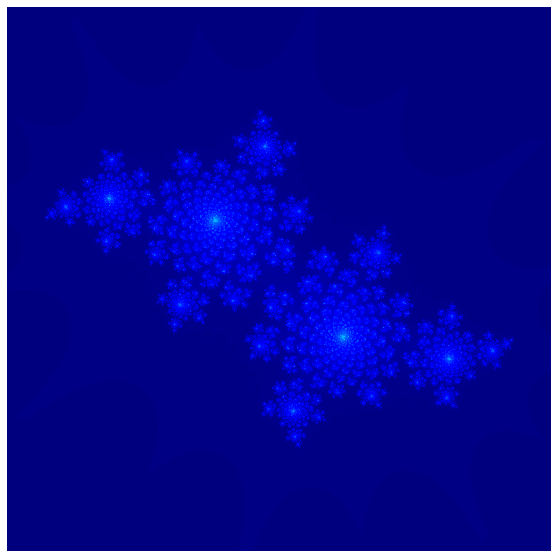

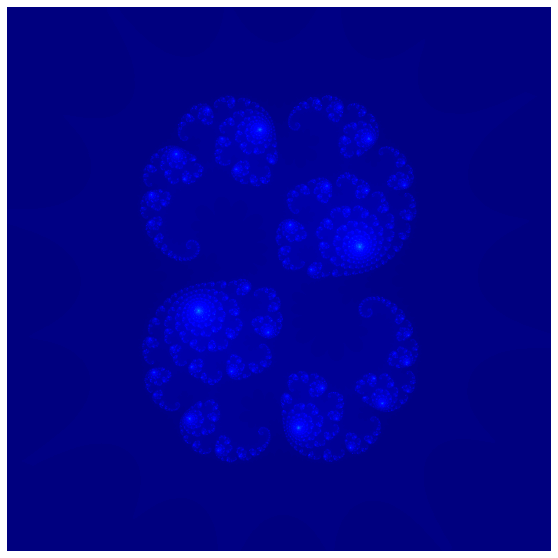

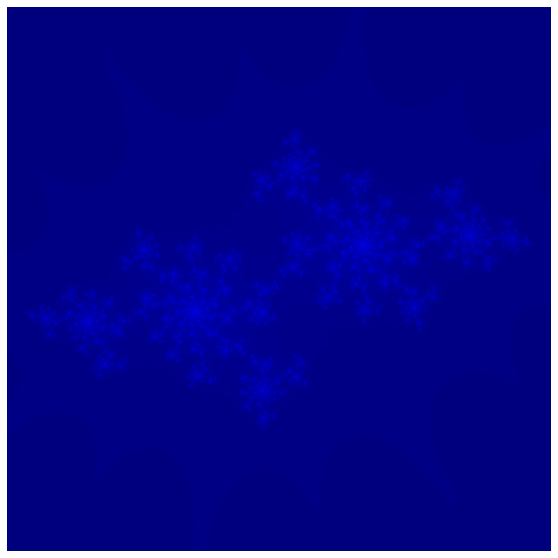

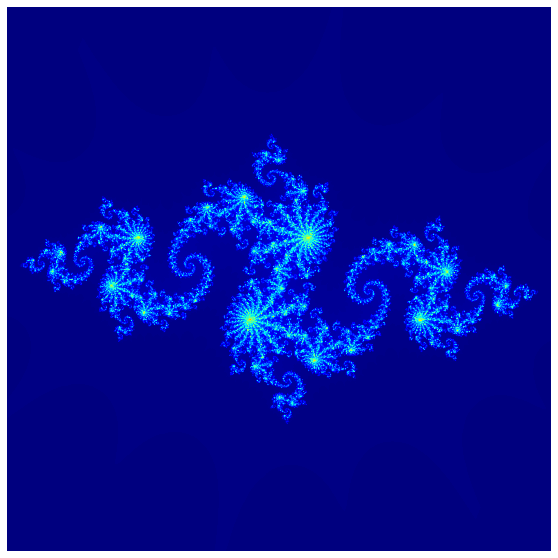

In [56]:
for img in [img_do1, img_do2, img_do3, img_do4]:

    fig = plt.figure(figsize=(16,10))
    plt.imshow(img, cmap = 'jet', vmin=0, vmax = 1)
    plt.axis('off')
    #fig.savefig('bla.jpg', dpi = 300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

In [57]:
del img_do1, img_do2, img_do3, img_do4

In [58]:
%%time

num_p = mp.cpu_count()

with mp.Pool(processes = num_p) as p:
        imgs_js = p.map(do, [(-.4, .6), (.285, .01), (-.70176, -.3842), (-.8, .156)])

CPU times: user 54.3 ms, sys: 69.8 ms, total: 124 ms
Wall time: 33.6 s


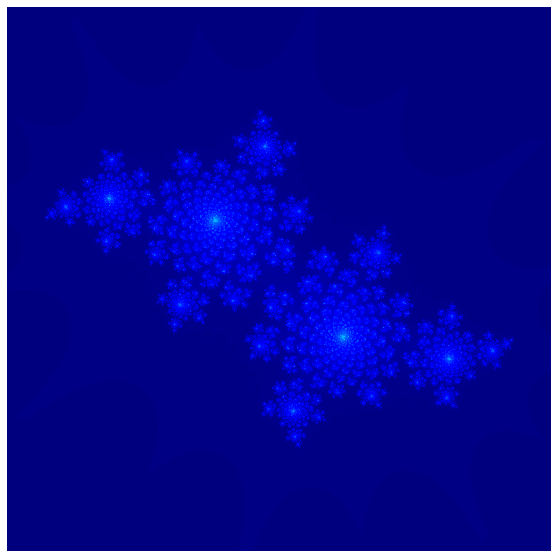

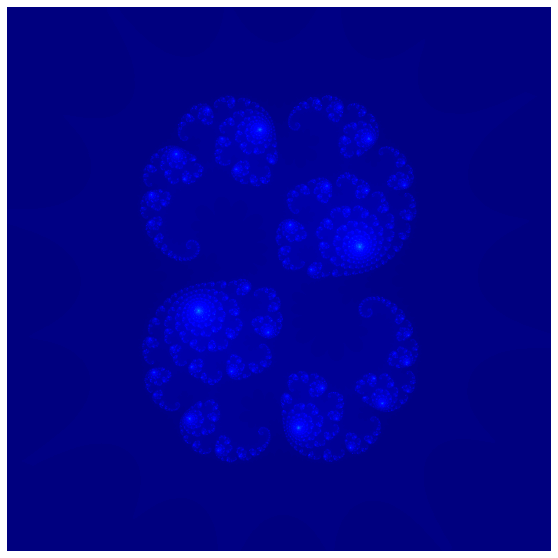

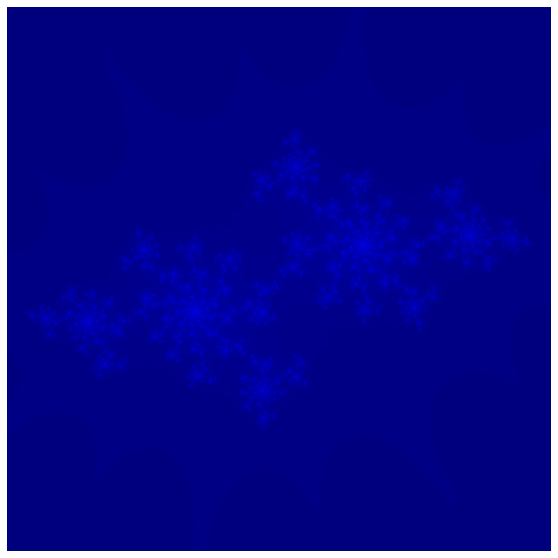

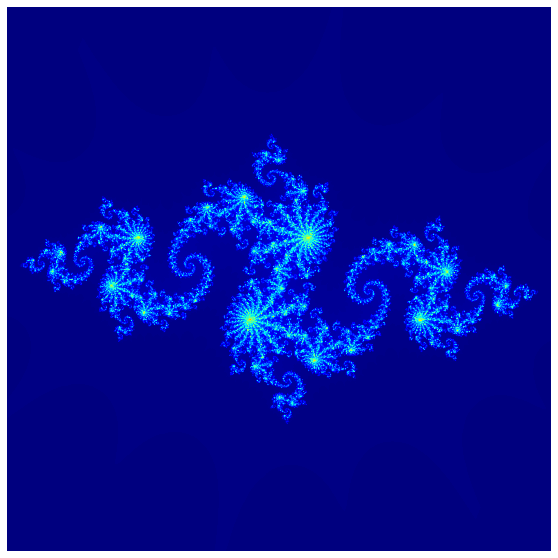

In [59]:
for img in imgs_js:

    fig = plt.figure(figsize=(16,10))
    plt.imshow(img, cmap = 'jet', vmin=0, vmax = 1)
    plt.axis('off')
    #fig.savefig('bla.jpg', dpi = 300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

## OpenCV and ColorMap

In [8]:

im = cv2.imread('julia.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#colorized = colormap(im)
#cv2.imshow("colorized", colorized)
#cv2.waitKey(0)
#cv2.imwrite("colorized.jpg", colorized)


NameError: name 'colormap' is not defined

In [89]:
im_gray = cv2.imread("julia.jpg", cv2.IMREAD_GRAYSCALE)
im_gray = 255 - im_gray
#im_gray = np.asarray(im_gray)
#im_gray = im_gray * 1
#im_gray[im_gray>255] = 255
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)

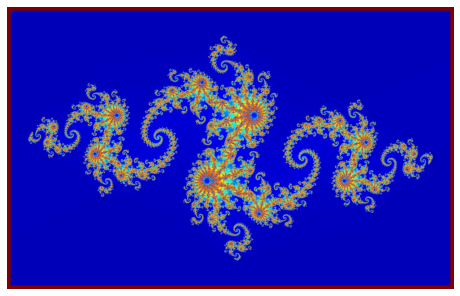

In [90]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(im_color)
plt.show();

In [58]:
np.max(im_gray)

102

In [64]:
im_gray = np.asarray(im_gray)
im_gray[im_gray>102] = 102

In [66]:
im_gray[im_gray>102] = 102

In [77]:
im_gray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
im_gray / 255

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
img_js.shape

(640, 1024)

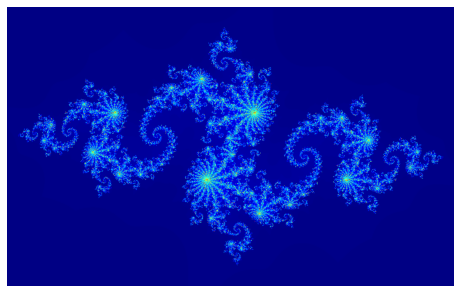

In [144]:
img = (255 - (img_js * 255))
img = img.astype(np.uint8)

img = cv2.applyColorMap(img, cv2.COLORMAP_JET)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(img)
plt.show();